        feature engeenring :

        FEATURE ENGEENRING INCLUDE;

        1>   EXTRACTING THE kEY VALUE FEATURES WHICH ARE USED IN MODEL TRAINING .

        2>   DETECTING THE OUTLIERS AND REMOVING THEM :
             
              IT IS DONE THROUGH VARIOUS  METHODS WHICH INCLUDES  1> STANDARIZATION , 2>POWER TRANSFORMATION 

        3> ENCODING THE CATEGORICAL COLUMSNB   


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [75]:
df=pd.read_csv('EasyVisa.csv')
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [76]:
df=df.drop(columns=['case_id'],axis=1)
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [77]:
missing_data=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
missing_data

[]

missing data list is empty it there are no colums / features which are empty 

In [78]:
from datetime import date
today_date=date.today()
current_year=today_date.year
df['company_age']=current_year-df['yr_of_estab']
df=df.drop(columns=['yr_of_estab'],axis=1)
df.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


In [79]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_feature

['no_of_employees', 'prevailing_wage', 'company_age']

In [80]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_feature

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [81]:
continous_feature=[feature for feature in numerical_feature if len(df[feature].unique())>=10]
continous_feature

['no_of_employees', 'prevailing_wage', 'company_age']

In [82]:
discrete_feature=[feature for feature in numerical_feature if feature not in continous_feature]
discrete_feature

[]

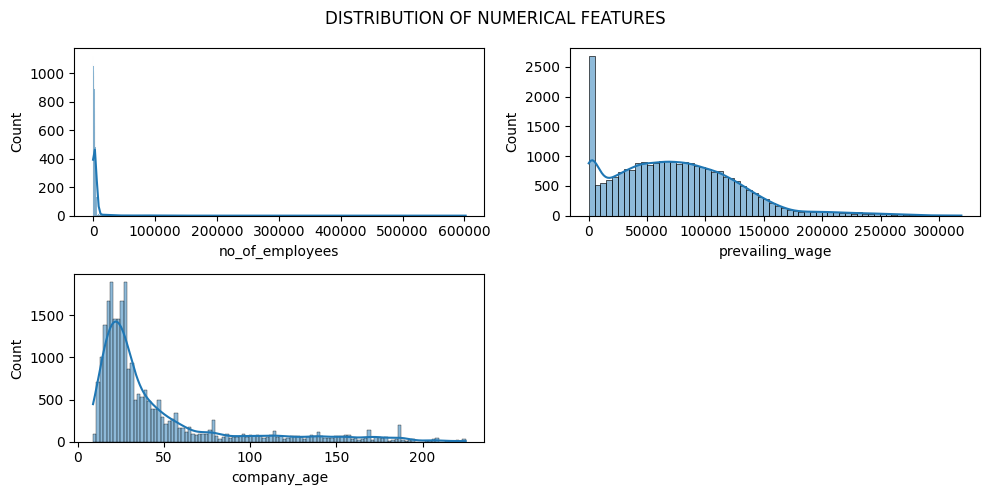

In [83]:
plt.figure(figsize=(10,5))
plt.suptitle('DISTRIBUTION OF NUMERICAL FEATURES')
for i in range (0,len(numerical_feature)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[numerical_feature[i]],kde=True)
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [84]:
X = df.drop(columns=['case_status'],axis=1)
y= df['case_status']

In [85]:
y= np.where(y=='Denied', 1,0)
y

array([1, 0, 1, ..., 0, 0, 0])

In [86]:
X[continous_feature].skew(axis=0)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

                        APPLYING POWER TRANSFORMER 

In [87]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
transform_feature=['no_of_employees','company_age']
X_copy=pt.fit_transform(X[transform_feature])
X_copy=pd.DataFrame(X_copy,columns=transform_feature)
X_copy.head()

,no_of_employees,company_age
0,1.517300,-0.955551
1,0.030912,-0.467001
2,2.885076,-1.078363
3,-1.343550,1.630914
4,-0.432287,-0.738126


                     YEO-JOHNSON METHOD IS ISED WHEN OUR DATA CONTAINS BOTH POSITIVE AN DNEGATIVE VALUES INCLUDING XERO 

                     BOX-COX METHOD IS UDED WHEN OUR DATA IS CONTAINS ONLY POSITIVE VALUES:



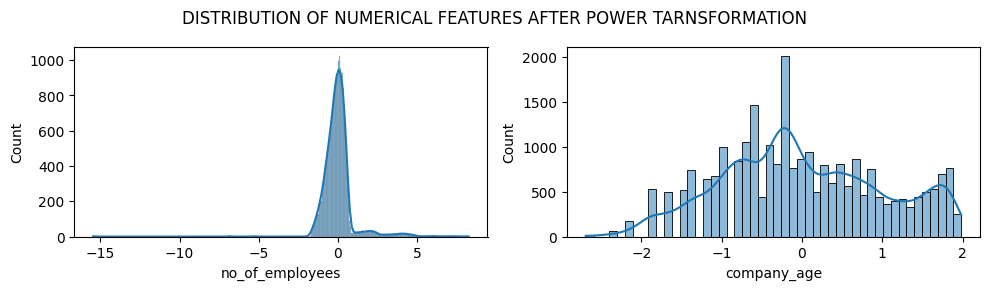

In [88]:
plt.figure(figsize=(10,5))
plt.suptitle('DISTRIBUTION OF NUMERICAL FEATURES AFTER POWER TARNSFORMATION')
for i in range (0,len(transform_feature)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X_copy[transform_feature[i]],kde=True)
    plt.xlabel(transform_feature[i])
    plt.tight_layout()

                                      FEATURE ENCODING AND SCALING USING COLUMANR TARNSFORMER 

In [89]:
categorical_feature.remove('case_status')

In [90]:
oh_colums=['has_job_experience','requires_job_training','full_time_position', 'education_of_employee']
or_colums=['continent','region_of_employment','unit_of_wage']
tranform_column=['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , PowerTransformer , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

oh_transformer=OneHotEncoder()
or_transformer=OrdinalEncoder()
scaler=StandardScaler()


transfrom_pipe=Pipeline(steps=[('transfromer' , PowerTransformer(method='yeo-johnson'))])



preprocessor=ColumnTransformer(
                            [
                                ("onehotencoder",OneHotEncoder(),oh_colums),
                                ("ordinalencoder",OneHotEncoder(),or_colums),
                                ("power_tranformer",transfrom_pipe,tranform_column),
                                ("scaling",StandardScaler(),numerical_feature)
                            ]
                                
                            )


In [91]:
X=preprocessor.fit_transform(X)


In [92]:
from imblearn.combine import SMOTETomek,SMOTEENN
smt=SMOTEENN(random_state=42,sampling_strategy='minority')
X_res,y_res=smt.fit_resample(X,y)

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12864, 30)
(4288, 30)
(12864,)
(4288,)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score,f1_score,roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [95]:
def evaluate_clf(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    f1=f1_score(actual,predicted)
    precision=precision_score(actual,predicted)
    recall=recall_score(actual,predicted)
    roc_score=roc_auc_score(actual,predicted)
    return acc_score,f1,precision,recall,roc_score


In [96]:
models={
    'logistic_regression':LogisticRegression(),
    'randomforest': RandomForestClassifier(),
    'decisiontree':DecisionTreeClassifier(),
    'gradientboosting':GradientBoostingClassifier(),
    'adaboost':AdaBoostClassifier(),
    'knearest':KNeighborsClassifier(),
    'supportvector':SVC(),
    'Xgboost':XGBClassifier(),
    'catboosting':CatBoostClassifier()
}

In [116]:
def evaluate_models(X,y,models):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
    model_list=[]
    accuracy_list=[]
    auc=[]

    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)

        model_train_accuracy,model_train_f1,model_train_precision,model_train_recall,model_train_roc_auc=evaluate_clf(y_train,y_train_pred)
        model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_roc_auc=evaluate_clf(y_test,y_test_pred)

        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        print('model performance fror training set')
        print('training accuarcy: {:.4f}'.format(model_train_accuracy))
        print('training f1_score: {:.4f}'.format(model_train_f1))
        print('training precision score {:.4f}:'.format(model_train_precision))
        print('training recall score: {:.4f}'.format(model_train_recall))
        print('training roc_auc_score: {:.4f}'.format(model_train_roc_auc))

        print('---------------------------------------------------------------------------')

        print('model performance fror test set')
        print('test accuarcy: {:.4f}'.format(model_train_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('test f1_score: {:.4f}'.format(model_train_f1))
        print('test precision score: {:.4f}'.format(model_train_precision))
        print('test recall score:{:.4f}'.format(model_train_recall))
        print('test roc_auc_score: {:.4f}'.format(model_train_roc_auc))

        print('-------------------------------------------------------------------------' \
        '-------------------------------------------------------------------------------') 
    report = pd.DataFrame(list(zip(model_list,accuracy_list)),columns=['model_name','accuracy']).sort_values(by=['accuracy'])
    return report 

        

In [117]:
y_res

array([0, 0, 0, ..., 1, 1, 1])

In [118]:

model_report=evaluate_models(X=X_res,y=y_res,models=models)

logistic_regression
model performance fror training set
training accuarcy: 0.8517
training f1_score: 0.8619
training precision score 0.8644:
training recall score: 0.8594
training roc_auc_score: 0.8510
---------------------------------------------------------------------------
model performance fror test set
test accuarcy: 0.8517
test f1_score: 0.8619
test precision score: 0.8644
test recall score:0.8594
test roc_auc_score: 0.8510
--------------------------------------------------------------------------------------------------------------------------------------------------------
randomforest
model performance fror training set
training accuarcy: 1.0000
training f1_score: 1.0000
training precision score 1.0000:
training recall score: 1.0000
training roc_auc_score: 1.0000
---------------------------------------------------------------------------
model performance fror test set
test accuarcy: 1.0000
test f1_score: 1.0000
test precision score: 1.0000
test recall score:1.0000
test roc_au

In [119]:
model_report

,model_name,accuracy
0,logistic_regression,0.861940
4,adaboost,0.867537
3,gradientboosting,0.888293
6,supportvector,0.893657
2,decisiontree,0.918377
8,catboosting,0.923274
7,Xgboost,0.927705
5,knearest,0.938200
1,randomforest,0.952659


In [120]:
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

In [122]:
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [123]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name , model , params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,cv=3,n_iter=100,n_jobs=-1)
    random.fit(X_res,y_res)
    model_params[name]=random.best_params_

for model_name in model_params:
    print(f"--------------best parameter for model: {model_name}")
    print(model_params[model_name])
    

--------------best parameter for model: XGBoost
{'min_child_weight': 1, 'max_depth': 9}
--------------best parameter for model: RF
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
--------------best parameter for model: KNN
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}


In [124]:
model_params

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}}

In [125]:
print(model_params['RF'])
print(model_params['XGBoost'])
print(model_params['KNN'])

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
{'min_child_weight': 1, 'max_depth': 9}
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}


In [128]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators= 200, max_features= 'sqrt', max_depth= None),
    "KNeighborsClassifier": KNeighborsClassifier(weights= 'distance', n_neighbors= 3, algorithm= 'auto'),
    "XGBClassifier": XGBClassifier(min_child_weight= 1, max_depth= 9)
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
model performance fror training set
training accuarcy: 1.0000
training f1_score: 1.0000
training precision score 1.0000:
training recall score: 1.0000
training roc_auc_score: 1.0000
---------------------------------------------------------------------------
model performance fror test set
test accuarcy: 1.0000
test f1_score: 1.0000
test precision score: 1.0000
test recall score:1.0000
test roc_auc_score: 1.0000
--------------------------------------------------------------------------------------------------------------------------------------------------------
KNeighborsClassifier
model performance fror training set
training accuarcy: 1.0000
training f1_score: 1.0000
training precision score 1.0000:
training recall score: 1.0000
training roc_auc_score: 1.0000
---------------------------------------------------------------------------
model performance fror test set
test accuarcy: 1.0000
test f1_score: 1.0000
test precision score: 1.0000
test recall score:1.000

In [129]:
tuned_report

,model_name,accuracy
2,XGBClassifier,0.940532
0,Random Forest Classifier,0.951259
1,KNeighborsClassifier,0.964086


In [131]:
best_model=KNeighborsClassifier(weights= 'distance', n_neighbors= 3, algorithm= 'auto')
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
score=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print('------------------------FINAL MODEL KNN---------------------')
print(score)
print('-------------------------------')
print(cr)

------------------------FINAL MODEL KNN---------------------
0.9640858208955224
-------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2014
           1       0.95      0.98      0.97      2274

    accuracy                           0.96      4288
   macro avg       0.97      0.96      0.96      4288
weighted avg       0.96      0.96      0.96      4288

